In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('liver.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


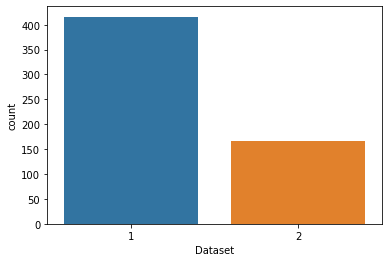

In [7]:
sns.countplot(df['Dataset'])

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df = df.fillna(df.mean())

In [10]:
df.Dataset.value_counts(1)*100

1    71.35506
2    28.64494
Name: Dataset, dtype: float64

In [11]:
cat_features = df.select_dtypes(include=[np.object])
cat_features.dtypes

Gender    object
dtype: object

In [12]:
corr_matrix = abs(df.corr())
print(corr_matrix["Dataset"].sort_values(ascending=False).head(10))

Dataset                       1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Albumin_and_Globulin_Ratio    0.162319
Albumin                       0.161388
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Total_Protiens                0.035008
Name: Dataset, dtype: float64


In [13]:
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)

In [14]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [15]:
X = df.drop(['Dataset'],axis=1)
y = df['Dataset']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

Before OverSampling, counts of label '1': 289
Before OverSampling, counts of label '2': 119 



In [19]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [20]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

After OverSampling, the shape of train_X: (578, 10)
After OverSampling, the shape of train_y: (578,) 

After OverSampling, counts of label '1': 289
After OverSampling, counts of label '2': 289


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [23]:
#Grid Search
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.7638, with best C: {'C': 4}


In [24]:
lr1 = LogisticRegression(C =4) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           1       0.95      0.59      0.73       127
           2       0.46      0.92      0.61        48

    accuracy                           0.68       175
   macro avg       0.70      0.75      0.67       175
weighted avg       0.81      0.68      0.70       175



In [37]:
lr1.score(X_test,y_test)*100

68.0

In [26]:
confusion_matrix(y_test, predictions)

array([[75, 52],
       [ 4, 44]], dtype=int64)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_split=4, min_samples_leaf= 2, max_leaf_nodes= 20, max_depth=50, criterion= 'entropy')
rf.fit(X_train_res, y_train_res.ravel())
predictions1 = rf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions1)) 

              precision    recall  f1-score   support

           1       0.83      0.65      0.73       127
           2       0.41      0.65      0.50        48

    accuracy                           0.65       175
   macro avg       0.62      0.65      0.62       175
weighted avg       0.72      0.65      0.67       175



In [31]:

rf.score(X_test,y_test)*100

65.14285714285715

In [32]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [35]:
cat.fit(X_train_res,y_train_res.ravel())

y_test_pred_cat = cat.predict(X_test)

Learning rate set to 0.008152
0:	learn: 0.6903943	total: 4.57ms	remaining: 4.57s
1:	learn: 0.6870688	total: 8.44ms	remaining: 4.21s
2:	learn: 0.6839120	total: 12ms	remaining: 4s
3:	learn: 0.6804089	total: 16ms	remaining: 3.98s
4:	learn: 0.6773640	total: 19.8ms	remaining: 3.94s
5:	learn: 0.6746021	total: 23.5ms	remaining: 3.89s
6:	learn: 0.6720642	total: 27.1ms	remaining: 3.84s
7:	learn: 0.6690695	total: 30.7ms	remaining: 3.81s
8:	learn: 0.6664201	total: 34.4ms	remaining: 3.78s
9:	learn: 0.6636794	total: 38.5ms	remaining: 3.81s
10:	learn: 0.6611662	total: 42.2ms	remaining: 3.8s
11:	learn: 0.6584284	total: 46.3ms	remaining: 3.81s
12:	learn: 0.6557671	total: 50.1ms	remaining: 3.81s
13:	learn: 0.6528642	total: 53.6ms	remaining: 3.77s
14:	learn: 0.6502118	total: 57.3ms	remaining: 3.76s
15:	learn: 0.6481368	total: 60.8ms	remaining: 3.74s
16:	learn: 0.6456844	total: 64.7ms	remaining: 3.74s
17:	learn: 0.6432471	total: 68.4ms	remaining: 3.73s
18:	learn: 0.6409782	total: 72.1ms	remaining: 3.72s


164:	learn: 0.4559704	total: 654ms	remaining: 3.31s
165:	learn: 0.4553916	total: 659ms	remaining: 3.31s
166:	learn: 0.4546824	total: 663ms	remaining: 3.31s
167:	learn: 0.4537030	total: 668ms	remaining: 3.31s
168:	learn: 0.4530593	total: 672ms	remaining: 3.31s
169:	learn: 0.4519972	total: 677ms	remaining: 3.3s
170:	learn: 0.4513063	total: 681ms	remaining: 3.3s
171:	learn: 0.4505536	total: 685ms	remaining: 3.29s
172:	learn: 0.4496276	total: 688ms	remaining: 3.29s
173:	learn: 0.4487493	total: 692ms	remaining: 3.28s
174:	learn: 0.4479588	total: 696ms	remaining: 3.28s
175:	learn: 0.4472245	total: 700ms	remaining: 3.28s
176:	learn: 0.4464653	total: 703ms	remaining: 3.27s
177:	learn: 0.4456961	total: 707ms	remaining: 3.26s
178:	learn: 0.4449301	total: 711ms	remaining: 3.26s
179:	learn: 0.4438268	total: 715ms	remaining: 3.26s
180:	learn: 0.4430231	total: 719ms	remaining: 3.25s
181:	learn: 0.4424749	total: 722ms	remaining: 3.25s
182:	learn: 0.4416908	total: 726ms	remaining: 3.24s
183:	learn: 0.

326:	learn: 0.3620456	total: 1.31s	remaining: 2.7s
327:	learn: 0.3616313	total: 1.31s	remaining: 2.69s
328:	learn: 0.3612447	total: 1.32s	remaining: 2.69s
329:	learn: 0.3609551	total: 1.32s	remaining: 2.69s
330:	learn: 0.3604987	total: 1.33s	remaining: 2.69s
331:	learn: 0.3598379	total: 1.33s	remaining: 2.68s
332:	learn: 0.3593946	total: 1.34s	remaining: 2.68s
333:	learn: 0.3591189	total: 1.34s	remaining: 2.67s
334:	learn: 0.3586720	total: 1.34s	remaining: 2.67s
335:	learn: 0.3581778	total: 1.35s	remaining: 2.67s
336:	learn: 0.3577354	total: 1.35s	remaining: 2.66s
337:	learn: 0.3571423	total: 1.36s	remaining: 2.66s
338:	learn: 0.3566862	total: 1.36s	remaining: 2.65s
339:	learn: 0.3563604	total: 1.36s	remaining: 2.65s
340:	learn: 0.3561014	total: 1.37s	remaining: 2.64s
341:	learn: 0.3559346	total: 1.37s	remaining: 2.64s
342:	learn: 0.3554569	total: 1.38s	remaining: 2.63s
343:	learn: 0.3550520	total: 1.38s	remaining: 2.63s
344:	learn: 0.3547379	total: 1.38s	remaining: 2.63s
345:	learn: 0

501:	learn: 0.2975609	total: 1.97s	remaining: 1.96s
502:	learn: 0.2970955	total: 1.98s	remaining: 1.95s
503:	learn: 0.2967717	total: 1.98s	remaining: 1.95s
504:	learn: 0.2964443	total: 1.98s	remaining: 1.94s
505:	learn: 0.2961556	total: 1.99s	remaining: 1.94s
506:	learn: 0.2958033	total: 1.99s	remaining: 1.94s
507:	learn: 0.2955026	total: 2s	remaining: 1.93s
508:	learn: 0.2951504	total: 2s	remaining: 1.93s
509:	learn: 0.2948888	total: 2s	remaining: 1.93s
510:	learn: 0.2945179	total: 2.01s	remaining: 1.92s
511:	learn: 0.2943289	total: 2.01s	remaining: 1.92s
512:	learn: 0.2941086	total: 2.02s	remaining: 1.91s
513:	learn: 0.2937963	total: 2.02s	remaining: 1.91s
514:	learn: 0.2934059	total: 2.02s	remaining: 1.9s
515:	learn: 0.2930169	total: 2.02s	remaining: 1.9s
516:	learn: 0.2926084	total: 2.03s	remaining: 1.9s
517:	learn: 0.2923031	total: 2.03s	remaining: 1.89s
518:	learn: 0.2919784	total: 2.04s	remaining: 1.89s
519:	learn: 0.2915747	total: 2.04s	remaining: 1.88s
520:	learn: 0.2912571	to

670:	learn: 0.2470261	total: 2.63s	remaining: 1.29s
671:	learn: 0.2468476	total: 2.64s	remaining: 1.29s
672:	learn: 0.2466557	total: 2.64s	remaining: 1.28s
673:	learn: 0.2464058	total: 2.65s	remaining: 1.28s
674:	learn: 0.2462101	total: 2.65s	remaining: 1.27s
675:	learn: 0.2460733	total: 2.65s	remaining: 1.27s
676:	learn: 0.2458617	total: 2.66s	remaining: 1.27s
677:	learn: 0.2457518	total: 2.66s	remaining: 1.26s
678:	learn: 0.2455047	total: 2.66s	remaining: 1.26s
679:	learn: 0.2453135	total: 2.67s	remaining: 1.25s
680:	learn: 0.2449659	total: 2.67s	remaining: 1.25s
681:	learn: 0.2446615	total: 2.67s	remaining: 1.25s
682:	learn: 0.2445653	total: 2.68s	remaining: 1.24s
683:	learn: 0.2442321	total: 2.68s	remaining: 1.24s
684:	learn: 0.2439291	total: 2.69s	remaining: 1.24s
685:	learn: 0.2437509	total: 2.69s	remaining: 1.23s
686:	learn: 0.2434923	total: 2.69s	remaining: 1.23s
687:	learn: 0.2431021	total: 2.7s	remaining: 1.22s
688:	learn: 0.2429053	total: 2.7s	remaining: 1.22s
689:	learn: 0.

845:	learn: 0.2033668	total: 3.29s	remaining: 600ms
846:	learn: 0.2031386	total: 3.3s	remaining: 596ms
847:	learn: 0.2027130	total: 3.3s	remaining: 592ms
848:	learn: 0.2025293	total: 3.31s	remaining: 588ms
849:	learn: 0.2023325	total: 3.31s	remaining: 584ms
850:	learn: 0.2021244	total: 3.31s	remaining: 580ms
851:	learn: 0.2018759	total: 3.32s	remaining: 577ms
852:	learn: 0.2016577	total: 3.33s	remaining: 573ms
853:	learn: 0.2014356	total: 3.33s	remaining: 569ms
854:	learn: 0.2013241	total: 3.33s	remaining: 565ms
855:	learn: 0.2008986	total: 3.34s	remaining: 561ms
856:	learn: 0.2006900	total: 3.34s	remaining: 558ms
857:	learn: 0.2004121	total: 3.34s	remaining: 554ms
858:	learn: 0.2000897	total: 3.35s	remaining: 550ms
859:	learn: 0.1998137	total: 3.35s	remaining: 546ms
860:	learn: 0.1994136	total: 3.36s	remaining: 542ms
861:	learn: 0.1991836	total: 3.36s	remaining: 538ms
862:	learn: 0.1989211	total: 3.37s	remaining: 534ms
863:	learn: 0.1987347	total: 3.37s	remaining: 530ms
864:	learn: 0.

In [36]:
cat.score(X_test,y_test)*100

69.14285714285714

In [38]:
from tpot import TPOTRegressor

E:\Users\azmina.vanzara\AppData\Roaming\Python\Python38\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [39]:
tpot = TPOTRegressor(verbosity=2, max_time_mins=5)
tpot.fit(X_train, y_train)

Version 0.11.5 of tpot is outdated. Version 0.11.6 was released Monday October 26, 2020.



Generation 1 - Current best internal CV score: -0.17067648545239625
Generation 2 - Current best internal CV score: -0.16739012195121952
5.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100)


TPOTRegressor(log_file=<ipykernel.iostream.OutStream object at 0x0000021C02C6A0D0>,
              max_time_mins=5, verbosity=2)

In [40]:
tpot.export('tpot_iris_pipeline.py')

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
model =  ExtraTreesClassifier(bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100)

In [45]:
model.fit(X_train_res,y_train_res.ravel())

y_test_pred_et = model.predict(X_test)

In [46]:
model.score(X_test,y_test)*100

69.71428571428572